Look at VG, etc., over time under the Tennessen et al. demographic model for Europeans.

In [1]:
%matplotlib inline
import pandas as pd
from tennessen import get_nlist
import matplotlib
import matplotlib.pyplot as plt

In [2]:
N=get_nlist()

In [3]:
len(N)

79020

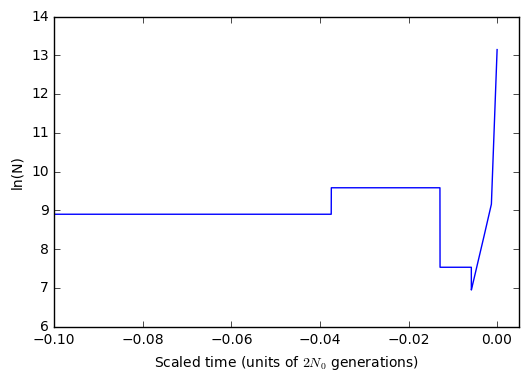

In [4]:
import numpy as np
generation=np.array(range(len(N)))
generation+=1
scaled_time = (generation-generation.max())/(2.0*generation.max())
plt.plot(scaled_time[8*N[0]+1:],np.log(N[8*N[0]+1:]))
plt.xlabel(r'Scaled time (units of '+r'$2N_0$'+" generations)")
plt.ylabel("ln(N)")
plt.xlim(-0.1,0.005)
logN=np.log(N)

In [5]:
import glob

In [6]:
L=[0.025, 0.05, 0.1, 0.25, 0.5]
H=[0,0.1,0.25,1]

In [12]:
#First, we're going to take all the raw input data
#and make a smaller summary file.  This will make plotting 
#much faster...
#These summaries are based on MEDIAN values
import os.path
if os.path.isfile('loadsummary.h5') is False:
    out=pd.HDFStore('loadsummary.h5',complevel=6,complib='zlib')
    for l in L:
        files=glob.glob('gbr.lambda'+str(l)+'*load*.h5')
        for f in files:
            x=pd.read_hdf(f)
            x=pd.melt(x,id_vars=['generation','rep'])
            x['stat']=x.variable.rename('stat')
            x.drop(['variable'],axis=1,inplace=True)
            xg=x.groupby(['stat','generation']).median()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['g']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        files=glob.glob('additive.lambda'+str(l)+'*load*.h5')
        for f in files:
            x=pd.read_hdf(f)
            x=pd.melt(x,id_vars=['generation','rep'])
            x['stat']=x.variable.rename('stat')
            x.drop(['variable'],axis=1,inplace=True)
            xg=x.groupby(['stat','generation']).median()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['a']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        for h in H:
            f='multi.lambda'+str(l)+'.load.h'+str(h)+'.h5'
            x=pd.read_hdf(f)
            x=pd.melt(x,id_vars=['generation','rep'])
            x['stat']=x.variable.rename('stat')
            x.drop(['variable'],axis=1,inplace=True)
            xg=x.groupby(['stat','generation']).median()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['m']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[float(h)]*len(xgt.index)
            out.append('statsumm',xgt)
    out.close()

In [13]:
#First, we're going to take all the raw input data
#and make a smaller summary file.  This will make plotting 
#much faster...
#These summaries are based on MEAN values
import os.path
if os.path.isfile('loadsummaryMean.h5') is False:
    out=pd.HDFStore('loadsummaryMean.h5',complevel=6,complib='zlib')
    for l in L:
        files=glob.glob('gbr.lambda'+str(l)+'*load*.h5')
        for f in files:
            x=pd.read_hdf(f)
            x=pd.melt(x,id_vars=['generation','rep'])
            x['stat']=x.variable.rename('stat')
            x.drop(['variable'],axis=1,inplace=True)
            xg=x.groupby(['stat','generation']).mean()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['g']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        files=glob.glob('additive.lambda'+str(l)+'*load*.h5')
        for f in files:
            x=pd.read_hdf(f)
            x=pd.melt(x,id_vars=['generation','rep'])
            x['stat']=x.variable.rename('stat')
            x.drop(['variable'],axis=1,inplace=True)            
            xg=x.groupby(['stat','generation']).mean()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['a']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        for h in H:
            f='multi.lambda'+str(l)+'.load.h'+str(h)+'.h5'
            x=pd.read_hdf(f)
            x=pd.melt(x,id_vars=['generation','rep'])
            x['stat']=x.variable.rename('stat')
            x.drop(['variable'],axis=1,inplace=True)
            xg=x.groupby(['stat','generation']).mean()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['m']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[float(h)]*len(xgt.index)
            out.append('statsumm',xgt)
    out.close()

In [14]:
#First, we're going to take all the raw input data
#and make a smaller summary file.  This will make plotting 
#much faster...
#These summaries are based on MEDIAN values
import os.path
if os.path.isfile('statsummary.h5') is False:
    out=pd.HDFStore('statsummary.h5',complevel=6,complib='zlib')
    for l in L:
        files=glob.glob('gbr.lambda'+str(l)+'*stats*.h5')
        for f in files:
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).median()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['g']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        files=glob.glob('additive.lambda'+str(l)+'*stats*.h5')
        for f in files:
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).median()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['a']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        for h in H:
            f='multi.lambda'+str(l)+'.stats.h'+str(h)+'.h5'
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).median()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['m']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[float(h)]*len(xgt.index)
            out.append('statsumm',xgt)
    out.close()

In [15]:
##Now, do summarizing based on the MEAN
if os.path.isfile('statsummaryMean.h5') is False:
    out=pd.HDFStore('statsummaryMean.h5',complevel=6,complib='zlib')
    for l in L:
        files=glob.glob('gbr.lambda'+str(l)+'*stats*.h5')
        for f in files:
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).mean()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['g']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        files=glob.glob('additive.lambda'+str(l)+'*stats*.h5')
        for f in files:
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).mean()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['a']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        for h in H:
            f='multi.lambda'+str(l)+'.stats.h'+str(h)+'.h5'
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).mean()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['m']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[float(h)]*len(xgt.index)
            out.append('statsumm',xgt)
    out.close()

In [7]:
s=pd.read_hdf('statsummaryMean.h5')
NoverTime=[]
for i in range(len(s.index)):
    g=s.generation.iloc[i]
    NoverTime.append(logN[g-1])
s['logN']=NoverTime
print(s.logN.max())

13.146079904


In [16]:
l=pd.read_hdf('loadsummaryMean.h5')
NoverTime=[]
for i in range(len(l.index)):
    g=l.generation.iloc[i]
    NoverTime.append(logN[g-1])
l['logN']=NoverTime

s=pd.concat([s,l])

In [17]:
set(l['stat'])
set(s['stat'])

{'VE',
 'VG',
 'Vst',
 'ebar',
 'f0',
 'fixed',
 'leading_e',
 'leading_q',
 'max_expl',
 'mload',
 'seg',
 'tbar',
 'total',
 'total_Aa',
 'total_aa',
 'total_fixed',
 'total_muts',
 'varw',
 'wbar'}

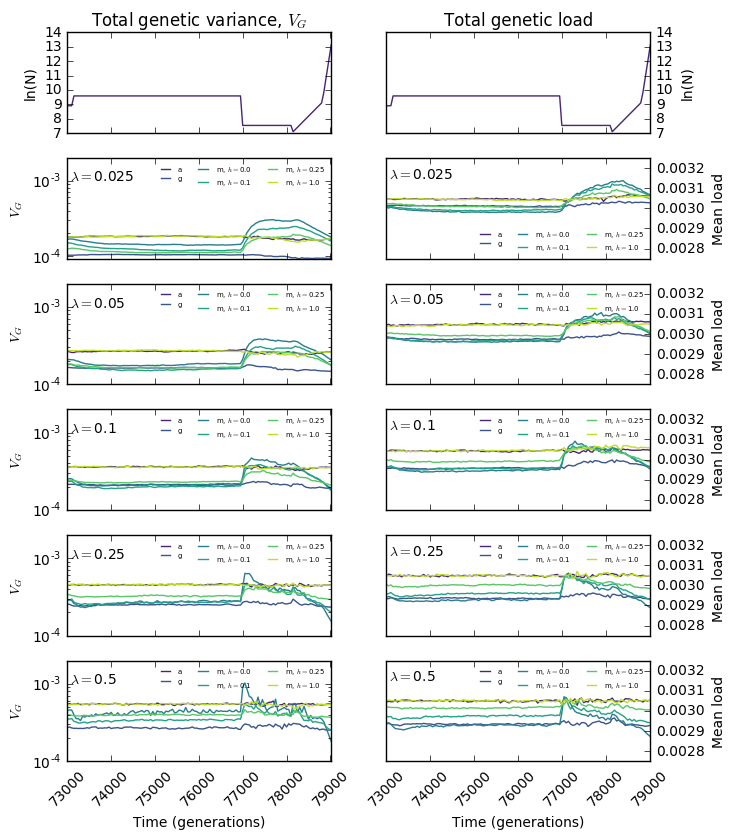

In [18]:
fig=plt.figure(figsize=(7.5,8.5))
#s=pd.read_hdf('statsummaryMean.h5')
#print l.head()

s['scaled_time']=(s.generation-s.generation.max())/(2.0*N.max())
#l['scaled_time']=(l.generation-l.generation.max())/(2.0*N.max())

#print s.head()
A=[]
B=[]
A.append(plt.subplot2grid((6,2),(0,0),colspan=1,rowspan=1))
B.append(plt.subplot2grid((6,2),(0,1),colspan=1,rowspan=1))
for i in range(len(L)):
    A.append(plt.subplot2grid((6,2),(i+1,0),colspan=1,rowspan=1))
    B.append(plt.subplot2grid((6,2),(i+1,1),colspan=1,rowspan=1))
FIRST=False
COLORS = [plt.cm.viridis(x) for x in np.linspace(0.1,0.9, 6)]
CI=0
#for m in sorted(s.model.unique()):
for i in range(len(L)):
    CI=0
    for m in sorted(s.model.unique()):
#    for i in range(len(L)):
        l=L[i]
        #print m,l
        #print(i)
        if m!='m':
            si=s[(s.model==m)&(s.e==l)]
            #print si.head()
            if i==0 and FIRST is False:
                A[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                B[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                FIRST = True
            A[i+1].semilogy(si.generation[si.stat=='VG'],si.value[si.stat=='VG'],label=m,color=COLORS[CI])
            B[i+1].plot(si.generation[si.stat=='total'],si.value[si.stat=='total'],label=m,color=COLORS[CI])
            #B[i+1].plot(li.generation[li.stat=='total'],si.value[si.stat=='total'],label=m,color=COLORS[CI])
            CI+=1
        else:
            for h in sorted(H):
                #print h
                si=s[(s.model==m)&(s.e==l)&(s.h==h)]
                A[i+1].semilogy(si.generation[si.stat=='VG'],
                          si.value[si.stat=='VG'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                B[i+1].plot(si.generation[si.stat=='total'],
                          si.value[si.stat=='total'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                #B[i+1].plot(li.generation[li.stat=='total'],
                #          li.value[li.stat=='total'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                CI+=1
        #print CI,len(COLORS)
        if CI==len(COLORS)-1:
            CI=0
#Axis details, etc.
for i in B:
    i.set_xlim(73000,79019)
    #i.set_xlim(-0.03,0.001)
    i.yaxis.tick_right()
    i.yaxis.set_label_position('right')
for i in A:
    #i.set_xlim(-0.03,0.001)
    i.set_xlim(73000,79019)
for i in range(1,len(A)):
    A[i].set_ylim(0.0,2e-3)
    A[i].yaxis.set_ticks([1e-4,1e-3])
    A[i].text(73050,1e-3,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    A[i].set_ylabel(r'$V_G$')
for i in range(1,len(B)):
    B[i].set_ylim(2.75e-3,3.25e-3)
    B[i].text(73050,3.15e-3,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    B[i].set_ylabel(r'Mean load')
for i in range(len(A)-1):
    plt.setp(A[i].get_xticklabels(),visible=False)
    plt.setp(B[i].get_xticklabels(),visible=False)
    
A[0].set_title("Total genetic variance, "+r'$V_G$')
B[0].set_title("Total genetic load")
A[len(A)-1].set_xlabel("Time (generations)")
plt.setp(A[len(A)-1].get_xticklabels(),rotation=45)
B[len(B)-1].set_xlabel("Time (generations)")
plt.setp(B[len(B)-1].get_xticklabels(),rotation=45)
A[0].set_ylabel("ln(N)")
B[0].set_ylabel("ln(N)")
for i in range(1,len(A)):
    A[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
B[1].legend(loc='lower right',prop={'size':5},ncol=3,frameon=False)
for i in range(2,len(B)):
    B[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
plt.tight_layout()
plt.show()
fig.savefig('TennessenStats.tif',dpi=600)

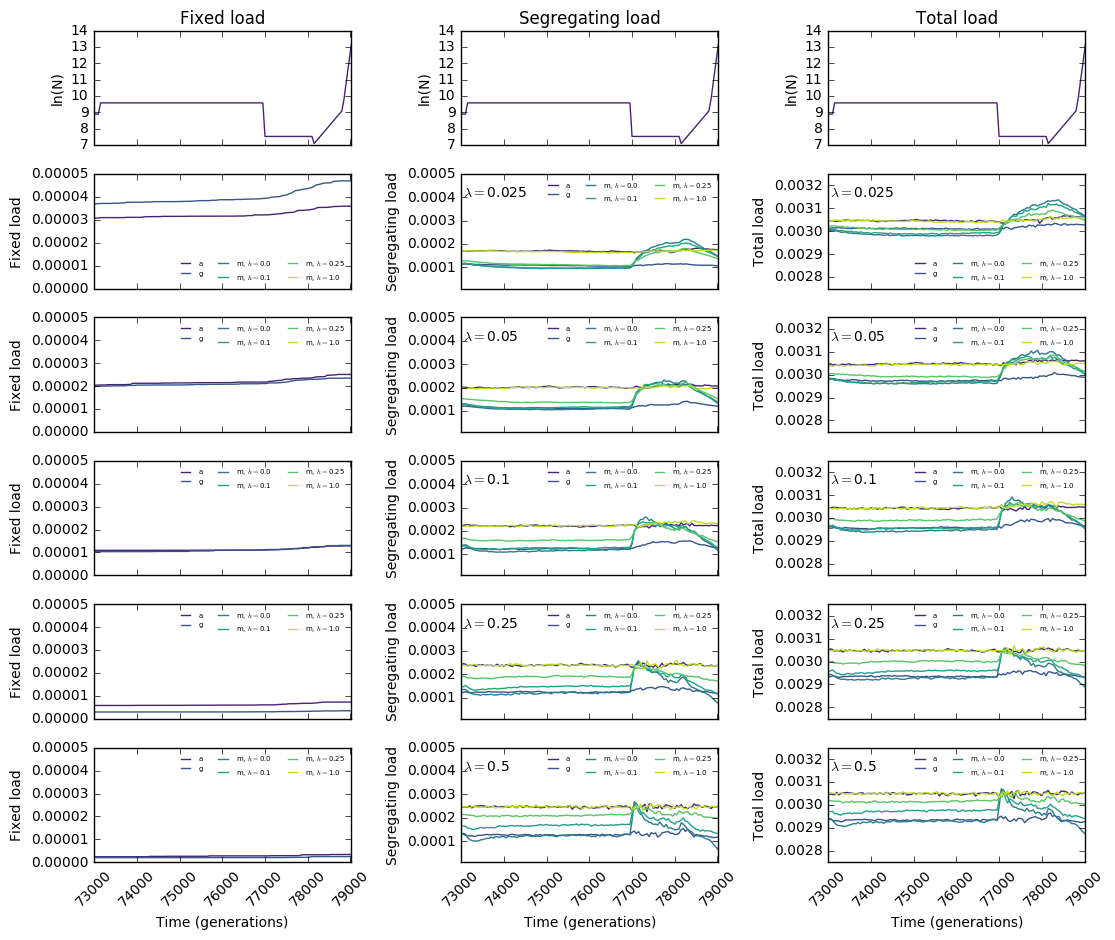

In [19]:
fig=plt.figure(figsize=(11.25,9.5))
#s=pd.read_hdf('statsummaryMean.h5')
#print l.head()

s['scaled_time']=(s.generation-s.generation.max())/(2.0*N.max())
#l['scaled_time']=(l.generation-l.generation.max())/(2.0*N.max())

A=[]
B=[]
C=[]
A.append(plt.subplot2grid((6,3),(0,0),colspan=1,rowspan=1))
B.append(plt.subplot2grid((6,3),(0,1),colspan=1,rowspan=1))
C.append(plt.subplot2grid((6,3),(0,2),colspan=1,rowspan=1))

for i in range(len(L)):
    A.append(plt.subplot2grid((6,3),(i+1,0),colspan=1,rowspan=1))
    B.append(plt.subplot2grid((6,3),(i+1,1),colspan=1,rowspan=1))
    C.append(plt.subplot2grid((6,3),(i+1,2),colspan=1,rowspan=1))
    
FIRST=False
COLORS = [plt.cm.viridis(x) for x in np.linspace(0.1,0.9, 6)]
CI=0
#for m in sorted(s.model.unique()):
for i in range(len(L)):
    CI=0
    for m in sorted(s.model.unique()):
#    for i in range(len(L)):
        l=L[i]
        #print m,l
        #print(i)
        if m!='m':
            si=s[(s.model==m)&(s.e==l)]
            #print si.head()
            if i==0 and FIRST is False:
                A[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                B[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                C[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                FIRST = True
            A[i+1].plot(si.generation[si.stat=='fixed'],si.value[si.stat=='fixed'],label=m,color=COLORS[CI])
            B[i+1].plot(si.generation[si.stat=='seg'],si.value[si.stat=='seg'],label=m,color=COLORS[CI])
            C[i+1].plot(si.generation[si.stat=='total'],si.value[si.stat=='total'],label=m,color=COLORS[CI])
            #B[i+1].plot(li.generation[li.stat=='total'],si.value[si.stat=='total'],label=m,color=COLORS[CI])
            CI+=1
        else:
            for h in sorted(H):
                #print h
                si=s[(s.model==m)&(s.e==l)&(s.h==h)]
                A[i+1].plot(si.generation[si.stat=='fixed'],
                          si.value[si.stat=='fixed'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                B[i+1].plot(si.generation[si.stat=='seg'],
                          si.value[si.stat=='seg'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                C[i+1].plot(si.generation[si.stat=='total'],
                          si.value[si.stat=='total'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])                
                #B[i+1].plot(li.generation[li.stat=='total'],
                #          li.value[li.stat=='total'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                CI+=1
        #print CI,len(COLORS)
        if CI==len(COLORS)-1:
            CI=0
#Axis details, etc.

for i in C:
    i.set_xlim(73000,79019)
    #i.set_xlim(-0.03,0.001)
for i in B:
    #i.set_xlim(-0.03,0.001)
    i.set_xlim(73000,79019)    
for i in A:
    #i.set_xlim(-0.03,0.001)
    i.set_xlim(73000,79019)
    
amax = [8e-5,5e-5,3e-5,1e-5,5e-6]
amin = []
for i in range(1,len(A)):
    A[i].set_ylim(0,5e-5)
    #A[i].text(73050,7.2e-5,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    A[i].set_ylabel(r'Fixed load')
for i in range(1,len(B)):
    B[i].set_ylim(1e-5,5e-4)
    B[i].text(73050,0.000402,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    B[i].set_ylabel(r'Segregating load')
for i in range(1,len(C)):
    C[i].set_ylim(2.75e-3,3.25e-3)
    C[i].text(73050,3.15e-3,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    C[i].set_ylabel(r'Total load')
for i in range(len(A)-1):
    plt.setp(A[i].get_xticklabels(),visible=False)
    plt.setp(B[i].get_xticklabels(),visible=False)
    plt.setp(C[i].get_xticklabels(),visible=False)
    
A[0].set_title("Fixed load")
B[0].set_title("Segregating load")
C[0].set_title("Total load")
    
A[len(A)-1].set_xlabel("Time (generations)")
plt.setp(A[len(A)-1].get_xticklabels(),rotation=45)
B[len(B)-1].set_xlabel("Time (generations)")
plt.setp(B[len(B)-1].get_xticklabels(),rotation=45)
C[len(C)-1].set_xlabel("Time (generations)")
plt.setp(C[len(C)-1].get_xticklabels(),rotation=45)
A[0].set_ylabel("ln(N)")
B[0].set_ylabel("ln(N)")
C[0].set_ylabel("ln(N)")

A[1].legend(loc='lower right',prop={'size':5},ncol=3,frameon=False)
for i in range(2,len(A)):
    A[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
for i in range(1,len(B)):
    B[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
C[1].legend(loc='lower right',prop={'size':5},ncol=3,frameon=False)
for i in range(2,len(C)):
    C[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
plt.tight_layout()
plt.show()
fig.savefig('AllLoads.tif',dpi=600)

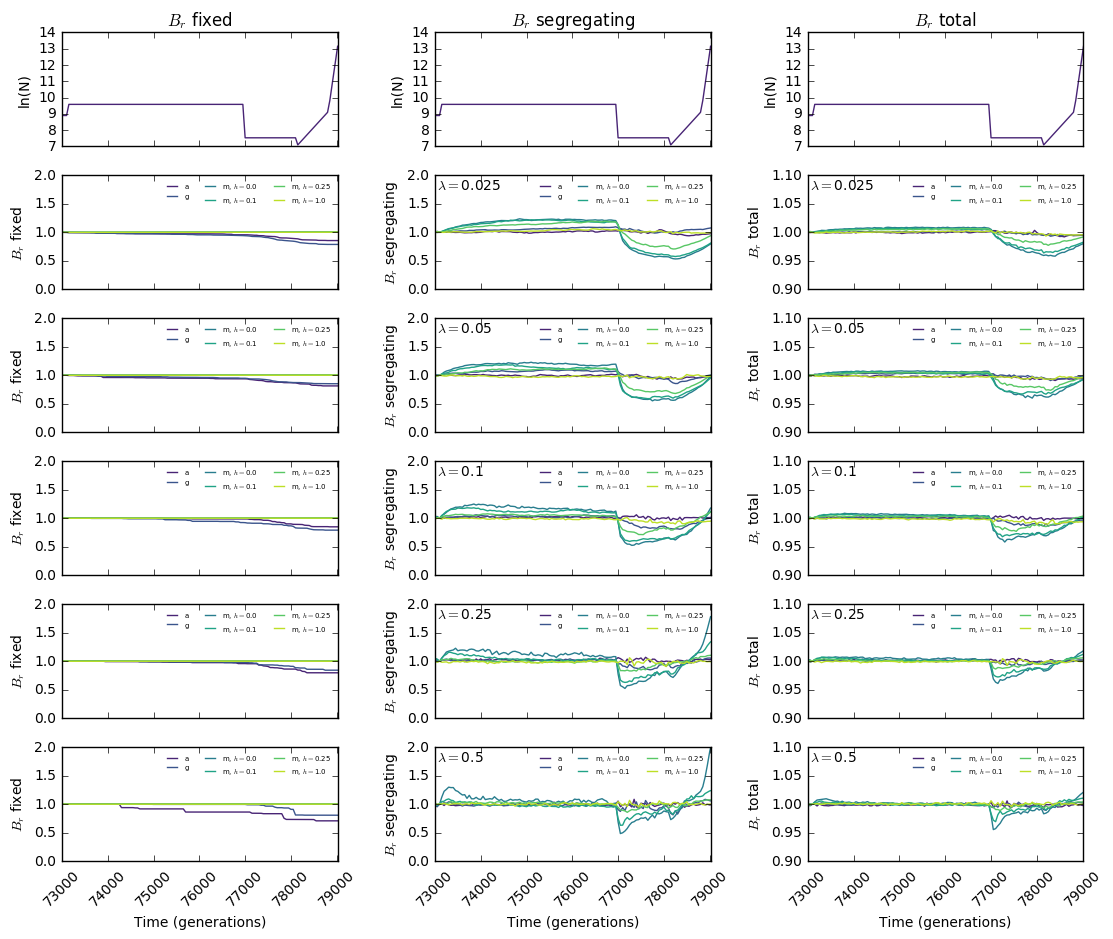

In [20]:
fig=plt.figure(figsize=(11.25,9.5))
#s=pd.read_hdf('statsummaryMean.h5')
#print l.head()

s['scaled_time']=(s.generation-s.generation.max())/(2.0*N.max())
#l['scaled_time']=(l.generation-l.generation.max())/(2.0*N.max())
#Prior to non-eq-demog
xx =-1+si.logN[si.stat=='VG'].reset_index(drop=True).where(si.logN[si.stat=='VG'].reset_index(drop=True)>8.896999).first_valid_index()

A=[]
B=[]
C=[]
A.append(plt.subplot2grid((6,3),(0,0),colspan=1,rowspan=1))
B.append(plt.subplot2grid((6,3),(0,1),colspan=1,rowspan=1))
C.append(plt.subplot2grid((6,3),(0,2),colspan=1,rowspan=1))

for i in range(len(L)):
    A.append(plt.subplot2grid((6,3),(i+1,0),colspan=1,rowspan=1))
    B.append(plt.subplot2grid((6,3),(i+1,1),colspan=1,rowspan=1))
    C.append(plt.subplot2grid((6,3),(i+1,2),colspan=1,rowspan=1))
    
FIRST=False
COLORS = [plt.cm.viridis(x) for x in np.linspace(0.1,0.9, 6)]
CI=0
#for m in sorted(s.model.unique()):
for i in range(len(L)):
    CI=0
    for m in sorted(s.model.unique()):
#    for i in range(len(L)):
        l=L[i]
        #print m,l
        #print(i)
        if m!='m':
            si=s[(s.model==m)&(s.e==l)]
            #print si.head()
            if i==0 and FIRST is False:
                A[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                B[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                C[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                FIRST = True
            A[i+1].plot(si.generation[si.stat=='fixed'],(si.value[si.stat=='fixed'].reset_index(drop=True)[xx])/si.value[si.stat=='fixed'].reset_index(drop=True)
,label=m,color=COLORS[CI])
            B[i+1].plot(si.generation[si.stat=='seg'],(si.value[si.stat=='seg'].reset_index(drop=True)[xx])/si.value[si.stat=='seg'],label=m,color=COLORS[CI])
            C[i+1].plot(si.generation[si.stat=='total'],(si.value[si.stat=='total'].reset_index(drop=True)[xx])/si.value[si.stat=='total'],label=m,color=COLORS[CI])
            #B[i+1].plot(li.generation[li.stat=='total'],si.value[si.stat=='total'],label=m,color=COLORS[CI])
            CI+=1
        else:
            for h in sorted(H):
                #print h
                si=s[(s.model==m)&(s.e==l)&(s.h==h)]
                A[i+1].plot(si.generation[si.stat=='fixed'],
                          (si.value[si.stat=='fixed'].reset_index(drop=True)[xx])/si.value[si.stat=='fixed'].reset_index(drop=True)
,label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                B[i+1].plot(si.generation[si.stat=='seg'],
                          (si.value[si.stat=='seg'].reset_index(drop=True)[xx])/si.value[si.stat=='seg'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                C[i+1].plot(si.generation[si.stat=='total'],
                          (si.value[si.stat=='total'].reset_index(drop=True)[xx])/si.value[si.stat=='total'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])                
                #B[i+1].plot(li.generation[li.stat=='total'],
                #          li.value[li.stat=='total'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                CI+=1
        #print CI,len(COLORS)
        if CI==len(COLORS)-1:
            CI=0
#Axis details, etc.

for i in C:
    i.set_xlim(73000,79019)
    #i.set_xlim(-0.03,0.001)
for i in B:
    #i.set_xlim(-0.03,0.001)
    i.set_xlim(73000,79019)    
for i in A:
    #i.set_xlim(-0.03,0.001)
    i.set_xlim(73000,79019)
    
amax = [8e-5,5e-5,3e-5,1e-5,5e-6]
amin = []
for i in range(1,len(A)):
    A[i].set_ylim(0,2)
    #A[i].text(73050,7.2e-5,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    A[i].set_ylabel(r'$B_r$'+" fixed")
for i in range(1,len(B)):
    B[i].set_ylim(0,2)
    B[i].text(73050,1.75,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    B[i].set_ylabel(r'$B_r$'+" segregating")
for i in range(1,len(C)):
    C[i].set_ylim(.9,1.1)
    C[i].text(73050,1.075,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    C[i].set_ylabel(r'$B_r$'+" total")
for i in range(len(A)-1):
    plt.setp(A[i].get_xticklabels(),visible=False)
    plt.setp(B[i].get_xticklabels(),visible=False)
    plt.setp(C[i].get_xticklabels(),visible=False)
    
A[0].set_title(r'$B_r$'+" fixed")
B[0].set_title(r'$B_r$'+" segregating")
C[0].set_title(r'$B_r$'+" total")
    
A[len(A)-1].set_xlabel("Time (generations)")
plt.setp(A[len(A)-1].get_xticklabels(),rotation=45)
B[len(B)-1].set_xlabel("Time (generations)")
plt.setp(B[len(B)-1].get_xticklabels(),rotation=45)
C[len(C)-1].set_xlabel("Time (generations)")
plt.setp(C[len(C)-1].get_xticklabels(),rotation=45)
A[0].set_ylabel("ln(N)")
B[0].set_ylabel("ln(N)")
C[0].set_ylabel("ln(N)")

#A[1].legend(loc='lower right',prop={'size':5},ncol=3,frameon=False)
for i in range(1,len(A)):
    A[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
for i in range(1,len(B)):
    B[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
#C[1].legend(loc='lower right',prop={'size':5},ncol=3,frameon=False)
for i in range(1,len(C)):
    C[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
plt.tight_layout()
plt.show()
fig.savefig('BurdenRatioLoad.tif',dpi=600)

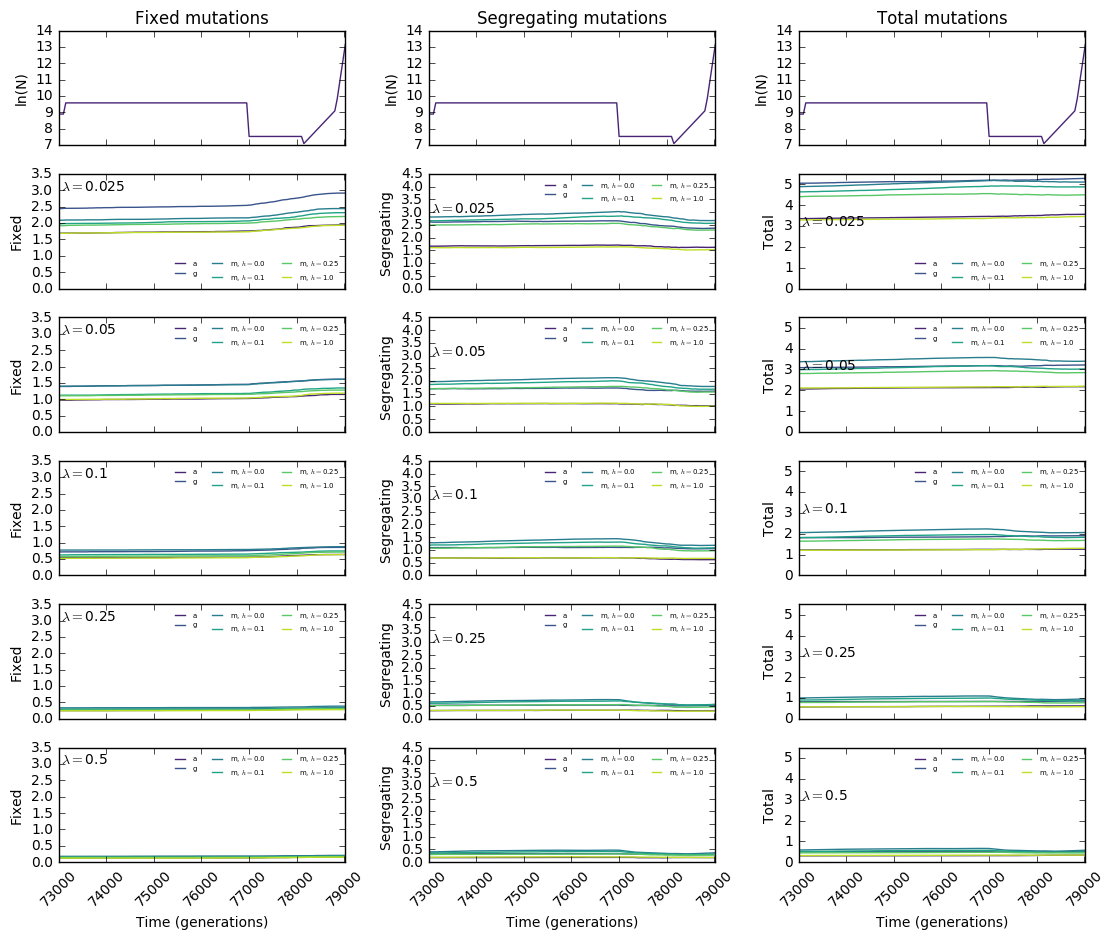

In [21]:
fig=plt.figure(figsize=(11.25,9.5))
#s=pd.read_hdf('statsummaryMean.h5')
#print l.head()

s['scaled_time']=(s.generation-s.generation.max())/(2.0*N.max())
#l['scaled_time']=(l.generation-l.generation.max())/(2.0*N.max())

A=[]
B=[]
C=[]
A.append(plt.subplot2grid((6,3),(0,0),colspan=1,rowspan=1))
B.append(plt.subplot2grid((6,3),(0,1),colspan=1,rowspan=1))
C.append(plt.subplot2grid((6,3),(0,2),colspan=1,rowspan=1))

for i in range(len(L)):
    A.append(plt.subplot2grid((6,3),(i+1,0),colspan=1,rowspan=1))
    B.append(plt.subplot2grid((6,3),(i+1,1),colspan=1,rowspan=1))
    C.append(plt.subplot2grid((6,3),(i+1,2),colspan=1,rowspan=1))
    
FIRST=False
COLORS = [plt.cm.viridis(x) for x in np.linspace(0.1,0.9, 6)]
CI=0
#for m in sorted(s.model.unique()):
for i in range(len(L)):
    CI=0
    for m in sorted(s.model.unique()):
#    for i in range(len(L)):
        l=L[i]
        #print m,l
        #print(i)
        if m!='m':
            si=s[(s.model==m)&(s.e==l)]
            #print si.head()
            if i==0 and FIRST is False:
                A[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                B[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                C[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                FIRST = True
            A[i+1].plot(si.generation[si.stat=='total_fixed'],si.value[si.stat=='total_fixed'],label=m,color=COLORS[CI])
            B[i+1].plot(si.generation[si.stat=='total_muts'],si.value[si.stat=='total_muts'],label=m,color=COLORS[CI])
            C[i+1].plot(si.generation[si.stat=='total_muts'],si.value[si.stat=='total_muts'].reset_index(drop=True)+si.value[si.stat=='total_fixed'].reset_index(drop=True),label=m,color=COLORS[CI])
            #B[i+1].plot(li.generation[li.stat=='total'],si.value[si.stat=='total'],label=m,color=COLORS[CI])
            CI+=1
        else:
            for h in sorted(H):
                #print h
                si=s[(s.model==m)&(s.e==l)&(s.h==h)]
                A[i+1].plot(si.generation[si.stat=='total_fixed'],
                          si.value[si.stat=='total_fixed'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                B[i+1].plot(si.generation[si.stat=='total_muts'],
                          si.value[si.stat=='total_muts'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])                
                C[i+1].plot(si.generation[si.stat=='total_muts'],
                          si.value[si.stat=='total_muts'].reset_index(drop=True)+si.value[si.stat=='total_fixed'].reset_index(drop=True),label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                
                #B[i+1].plot(li.generation[li.stat=='total'],
                #          li.value[li.stat=='total'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                CI+=1
        #print CI,len(COLORS)
        if CI==len(COLORS)-1:
            CI=0
#Axis details, etc.

for i in C:
    i.set_xlim(73000,79019)
    #i.set_xlim(-0.03,0.001)
for i in B:
    #i.set_xlim(-0.03,0.001)
    i.set_xlim(73000,79019)    
for i in A:
    #i.set_xlim(-0.03,0.001)
    i.set_xlim(73000,79019)
    
amax = [8e-5,5e-5,3e-5,1e-5,5e-6]
amin = []
for i in range(1,len(A)):
    A[i].set_ylim(0,3.5)
    A[i].text(73050,3,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    A[i].set_ylabel(r'Fixed')
for i in range(1,len(B)):
    B[i].set_ylim(0,4.5)
    B[i].text(73050,3,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    B[i].set_ylabel(r'Segregating ')
for i in range(1,len(C)):
    C[i].set_ylim(0,5.5)
    C[i].text(73050,3,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    C[i].set_ylabel(r'Total')
for i in range(len(A)-1):
    plt.setp(A[i].get_xticklabels(),visible=False)
    plt.setp(B[i].get_xticklabels(),visible=False)
    plt.setp(C[i].get_xticklabels(),visible=False)
    
A[0].set_title("Fixed mutations")
B[0].set_title("Segregating mutations")
C[0].set_title("Total mutations")
    
A[len(A)-1].set_xlabel("Time (generations)")
plt.setp(A[len(A)-1].get_xticklabels(),rotation=45)
B[len(B)-1].set_xlabel("Time (generations)")
plt.setp(B[len(B)-1].get_xticklabels(),rotation=45)
C[len(C)-1].set_xlabel("Time (generations)")
plt.setp(C[len(C)-1].get_xticklabels(),rotation=45)
A[0].set_ylabel("ln(N)")
B[0].set_ylabel("ln(N)")
C[0].set_ylabel("ln(N)")

A[1].legend(loc='lower right',prop={'size':5},ncol=3,frameon=False)
for i in range(2,len(A)):
    A[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
for i in range(1,len(B)):
    B[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
C[1].legend(loc='lower right',prop={'size':5},ncol=3,frameon=False)
for i in range(2,len(C)):
    C[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
plt.tight_layout()
plt.show()
fig.savefig('AllMutations.tif',dpi=600)

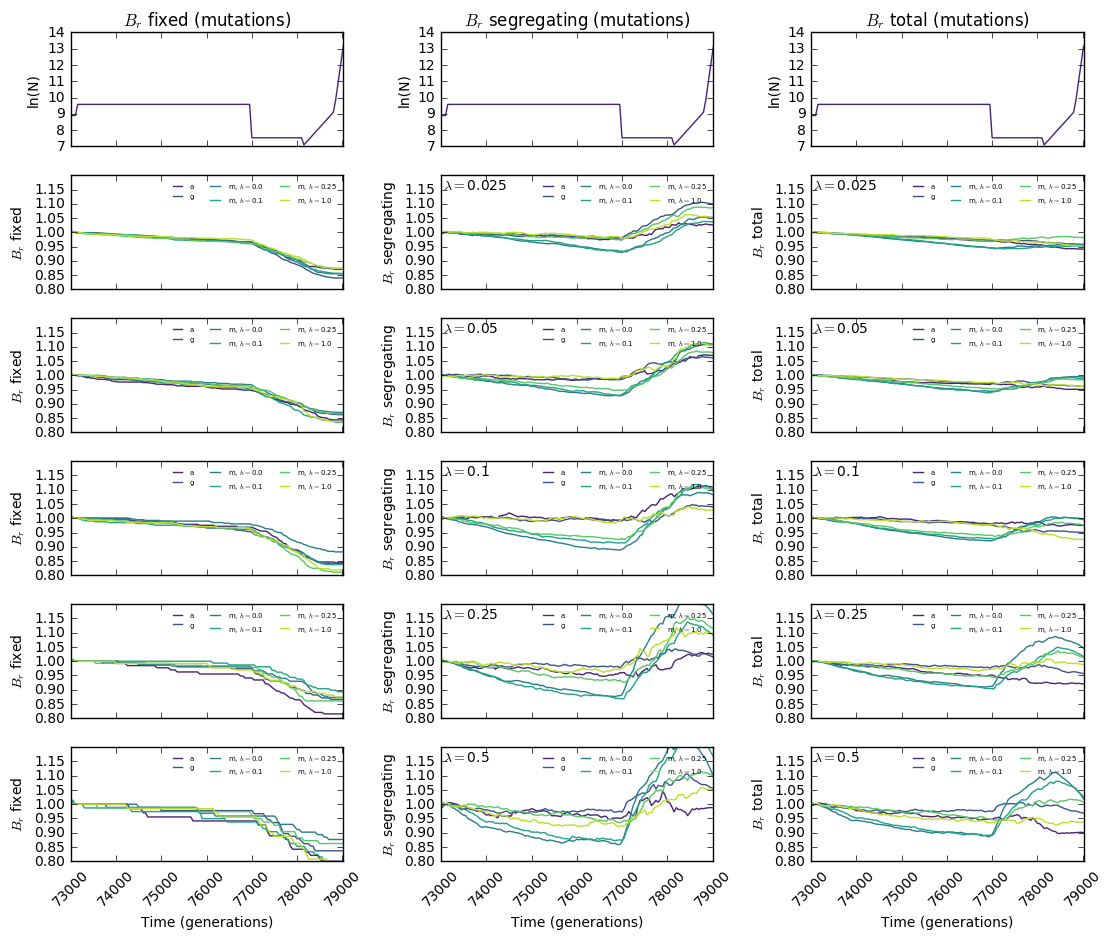

In [22]:
fig=plt.figure(figsize=(11.25,9.5))
#s=pd.read_hdf('statsummaryMean.h5')
#print l.head()

s['scaled_time']=(s.generation-s.generation.max())/(2.0*N.max())
#l['scaled_time']=(l.generation-l.generation.max())/(2.0*N.max())

#Prior to non-eq-demog
xx =-1+si.logN[si.stat=='VG'].reset_index(drop=True).where(si.logN[si.stat=='VG'].reset_index(drop=True)>8.896999).first_valid_index()

A=[]
B=[]
C=[]
A.append(plt.subplot2grid((6,3),(0,0),colspan=1,rowspan=1))
B.append(plt.subplot2grid((6,3),(0,1),colspan=1,rowspan=1))
C.append(plt.subplot2grid((6,3),(0,2),colspan=1,rowspan=1))

for i in range(len(L)):
    A.append(plt.subplot2grid((6,3),(i+1,0),colspan=1,rowspan=1))
    B.append(plt.subplot2grid((6,3),(i+1,1),colspan=1,rowspan=1))
    C.append(plt.subplot2grid((6,3),(i+1,2),colspan=1,rowspan=1))
    
FIRST=False
COLORS = [plt.cm.viridis(x) for x in np.linspace(0.1,0.9, 6)]
CI=0
#for m in sorted(s.model.unique()):
for i in range(len(L)):
    CI=0
    for m in sorted(s.model.unique()):
#    for i in range(len(L)):
        l=L[i]
        #print m,l
        #print(i)
        if m!='m':
            si=s[(s.model==m)&(s.e==l)]
            #print si.head()
            if i==0 and FIRST is False:
                A[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                B[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                C[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                FIRST = True
            A[i+1].plot(si.generation[si.stat=='total_fixed'],(si.value[si.stat=='total_fixed'].reset_index(drop=True)[xx])/si.value[si.stat=='total_fixed'].reset_index(drop=True)
,label=m,color=COLORS[CI])
            B[i+1].plot(si.generation[si.stat=='total_muts'],(si.value[si.stat=='total_muts'].reset_index(drop=True)[xx])/si.value[si.stat=='total_muts'],label=m,color=COLORS[CI])
            C[i+1].plot(si.generation[si.stat=='total_muts'],((si.value[si.stat=='total_muts'].reset_index(drop=True)+si.value[si.stat=='total_fixed'].reset_index(drop=True))[xx])/(si.value[si.stat=='total_muts'].reset_index(drop=True)+si.value[si.stat=='total_fixed'].reset_index(drop=True)),label=m,color=COLORS[CI])
            #B[i+1].plot(li.generation[li.stat=='total'],si.value[si.stat=='total'],label=m,color=COLORS[CI])
            CI+=1
        else:
            for h in sorted(H):
                #print h
                si=s[(s.model==m)&(s.e==l)&(s.h==h)]
                A[i+1].plot(si.generation[si.stat=='total_fixed'],
                          (si.value[si.stat=='total_fixed'].reset_index(drop=True)[xx])/si.value[si.stat=='total_fixed'].reset_index(drop=True)
,label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                B[i+1].plot(si.generation[si.stat=='total_muts'],
                          (si.value[si.stat=='total_muts'].reset_index(drop=True)[xx])/si.value[si.stat=='total_muts'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                C[i+1].plot(si.generation[si.stat=='total_muts'],
                          ((si.value[si.stat=='total_muts'].reset_index(drop=True)+si.value[si.stat=='total_fixed'].reset_index(drop=True))[xx])/(si.value[si.stat=='total_muts'].reset_index(drop=True)+si.value[si.stat=='total_fixed'].reset_index(drop=True)),label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                #B[i+1].plot(li.generation[li.stat=='total'],
                #          li.value[li.stat=='total'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                CI+=1
        #print CI,len(COLORS)
        if CI==len(COLORS)-1:
            CI=0
#Axis details, etc.
 #i.set_xlim(73000,79019)
for i in C:
    i.set_xlim(73000,79019)
    #i.set_xlim(-0.03,0.001)
for i in B:
    #i.set_xlim(-0.03,0.001)
    i.set_xlim(73000,79019)    
for i in A:
    #i.set_xlim(-0.03,0.001)
    i.set_xlim(73000,79019)
    
amax = [8e-5,5e-5,3e-5,1e-5,5e-6]
amin = []
for i in range(1,len(A)):
    A[i].set_ylim(0.8,1.2)
    #A[i].text(73050,7.2e-5,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    A[i].set_ylabel(r'$B_r$'+" fixed")
for i in range(1,len(B)):
    B[i].set_ylim(0.8,1.2)
    B[i].text(73050,1.15,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    B[i].set_ylabel(r'$B_r$'+" segregating")
for i in range(1,len(C)):
    C[i].set_ylim(.8,1.2)
    C[i].text(73050,1.15,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    C[i].set_ylabel(r'$B_r$'+" total")
for i in range(len(A)-1):
    plt.setp(A[i].get_xticklabels(),visible=False)
    plt.setp(B[i].get_xticklabels(),visible=False)
    plt.setp(C[i].get_xticklabels(),visible=False)
    
A[0].set_title(r'$B_r$'+" fixed (mutations)")
B[0].set_title(r'$B_r$'+" segregating (mutations)")
C[0].set_title(r'$B_r$'+" total (mutations)")
    
A[len(A)-1].set_xlabel("Time (generations)")
plt.setp(A[len(A)-1].get_xticklabels(),rotation=45)
B[len(B)-1].set_xlabel("Time (generations)")
plt.setp(B[len(B)-1].get_xticklabels(),rotation=45)
C[len(C)-1].set_xlabel("Time (generations)")
plt.setp(C[len(C)-1].get_xticklabels(),rotation=45)
A[0].set_ylabel("ln(N)")
B[0].set_ylabel("ln(N)")
C[0].set_ylabel("ln(N)")

#A[1].legend(loc='lower right',prop={'size':5},ncol=3,frameon=False)
for i in range(1,len(A)):
    A[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
for i in range(1,len(B)):
    B[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
#C[1].legend(loc='lower right',prop={'size':5},ncol=3,frameon=False)
for i in range(1,len(C)):
    C[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
plt.tight_layout()
plt.show()
fig.savefig('BurdenRatioMutations.tif',dpi=600)

In [117]:
m="a"
l=0.025
si=s[(s.model==m)&(s.e==l)]
#si.value[si.stat=='total_muts'].reset_index(drop=True)+si.value[si.stat=='total_fixed'].reset_index(drop=True)
xx =-1+si.logN[si.stat=='VG'].reset_index(drop=True).where(si.logN[si.stat=='VG'].reset_index(drop=True)>8.896999).first_valid_index()
xx


292

In [116]:
si.logN[si.stat=='VG'].reset_index(drop=True)[292]

8.896998552743824